In [1]:
import os
import random
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing
%matplotlib inline

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
class_names = ['AADHAR', 'PAN','N/A']

In [3]:
width = 100
height = 100
import os
import random
from glob import glob
from keras import preprocessing

In [4]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [5]:
images_type_1 = load_images('./data/aadhar')
images_type_2 = load_images('./data/pan')
images_type_3 = load_images('./data/NA')
len(images_type_1)

20

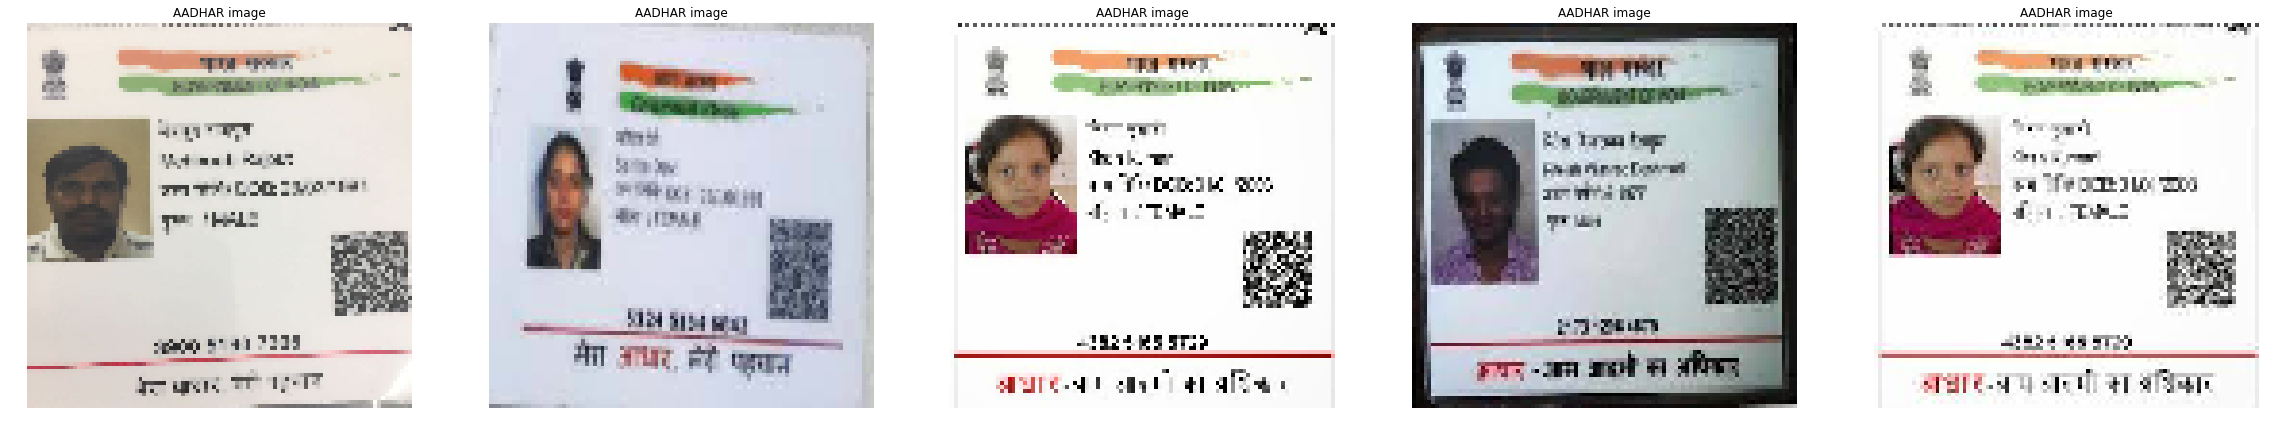

In [6]:
plt.figure(figsize=(40,20))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

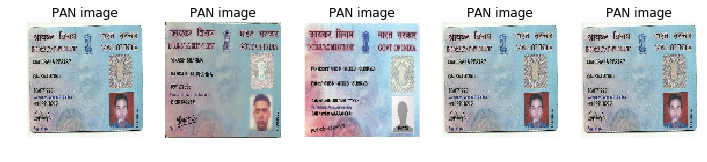

In [7]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

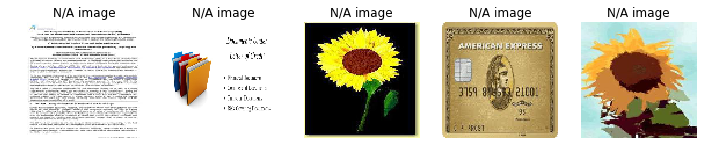

In [8]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_3))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[2]))

# show the plot
plt.show()

In [9]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)
print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)

(20, 100, 100, 3)
(14, 100, 100, 3)
(25, 100, 100, 3)


In [10]:
X = np.concatenate((X_type_1, X_type_2, X_type_3), axis=0)

In [11]:
X[0][1][1][1]

255.0

In [12]:
X = X / 255.

X.shape

(59, 100, 100, 3)

In [13]:
from keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]

y = np.concatenate((y_type_1, y_type_2, y_type_3), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(59, 3)


In [14]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 50
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [15]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

#model.summary()
X.shape,y.shape

((59, 100, 100, 3), (59, 3))

In [16]:
model.fit(X, y, epochs=epochs)

Epoch 1/50
59/59 [==============================] - 3s 51ms/step - loss: 3.0707 - acc: 0.2881
Epoch 2/50
59/59 [==============================] - 2s 38ms/step - loss: 1.9439 - acc: 0.3051
Epoch 3/50
59/59 [==============================] - 2s 32ms/step - loss: 1.1480 - acc: 0.3559
Epoch 4/50
59/59 [==============================] - 2s 30ms/step - loss: 1.1464 - acc: 0.4237
Epoch 5/50
59/59 [==============================] - 2s 29ms/step - loss: 1.0124 - acc: 0.4915
Epoch 6/50
59/59 [==============================] - 2s 31ms/step - loss: 0.9219 - acc: 0.4746
Epoch 7/50
59/59 [==============================] - 2s 31ms/step - loss: 0.9186 - acc: 0.5932
Epoch 8/50
59/59 [==============================] - 2s 31ms/step - loss: 0.9006 - acc: 0.5254
Epoch 9/50
59/59 [==============================] - 2s 37ms/step - loss: 0.8013 - acc: 0.6102
Epoch 10/50
59/59 [==============================] - 2s 39ms/step - loss: 0.6855 - acc: 0.7627
Epoch 11/50
59/59 [==============================] - 2s 33m

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5C68DEF790>


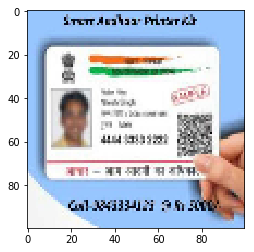

The type predicted is: AADHAR


In [18]:
type_1 = preprocessing.image.load_img('./data/validation/at1.jpg',
                                      target_size=(width, height))
print(type_1)
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)
#print(type_1_X)
predictions = model.predict(type_1_X)
print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5C4FD8E250>


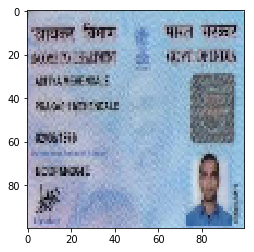

The type predicted is: PAN


In [20]:
type_1 = preprocessing.image.load_img('./data/validation/t1.jpg',
                                      target_size=(width, height))
print(type_1)
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)
#print(type_1_X)
predictions = model.predict(type_1_X)
print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

In [21]:
#Save the model
model.save('aadhar_pan_cnn_model.h5')